In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# FITTING AND EVALUATING

# LOAD
dataSet = load_iris()
type(dataSet)

# With dates
ALL     = pd.read_csv("Data/Datasets/Dataset_ALL.csv")

# Without dates
ALL     = pd.read_csv("Data/Datasets/Dataset_ALL_noDate.csv")


ALL_raw = ALL
Classification = ALL_raw['Classification']

ALL_raw = ALL_raw.drop(['Classification'],axis=1)
ALL_raw = ALL_raw.drop(['Unnamed: 0'],axis=1)



In [107]:
X = ALL_raw
y = Classification

# split the data with 70% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, train_size=0.7)

# SELECT CLASSIFIER
model_knn  = KNeighborsClassifier(n_neighbors=5)
model_lda  = LinearDiscriminantAnalysis(n_components=None,priors=None, store_covariance=True)
model_qda  = QuadraticDiscriminantAnalysis(priors=None,store_covariance=True)
model_tree = DecisionTreeClassifier()
model_gnb  = GaussianNB()


# FIT the model on one set of data
model_knn.fit(Xtrain, ytrain)
model_lda.fit(Xtrain, ytrain)
model_qda.fit(Xtrain, ytrain)
model_tree.fit(Xtrain, ytrain)
model_gnb.fit(Xtrain, ytrain)

# TEST evaluate the model on the second set of data
ytest_pred_knn  = model_knn.predict(Xtest)
ytest_pred_lda  = model_lda.predict(Xtest)
ytest_pred_qda  = model_qda.predict(Xtest)
ytest_pred_tree = model_tree.predict(Xtest)
ytest_pred_gnb  = model_gnb.predict(Xtest)

# Classification Report
print('KNN:')
print(classification_report(ytest, ytest_pred_knn))
print('LDA:')
print(classification_report(ytest, ytest_pred_lda))
print('QDA:')
print(classification_report(ytest, ytest_pred_qda))
print('TREE:')
print(classification_report(ytest, ytest_pred_tree))
print('GNB:')
print(classification_report(ytest, ytest_pred_gnb))


# Cross Validarion Scores
scores_knn  = cross_val_score(model_knn,  Xtest, ytest, cv=5)
scores_lda  = cross_val_score(model_lda,  Xtest, ytest, cv=5)
scores_qda  = cross_val_score(model_qda,  Xtest, ytest, cv=5)
scores_tree = cross_val_score(model_tree, Xtest, ytest, cv=5)
scores_gnb  = cross_val_score(model_gnb,  Xtest, ytest, cv=5)


# Cross Validation 
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LDA: %0.2f (+/- %0.2f)" % (scores_lda.mean(), scores_lda.std() * 2))
print("Accuracy QDA: %0.2f (+/- %0.2f)" % (scores_qda.mean(), scores_qda.std() * 2))
print("Accuracy TREE: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))
print("Accuracy GNB: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), scores_gnb.std() * 2))


# Confusion Matrix Plot
cm1 = confusion_matrix(ytest_pred_knn, ytest)
cm2 = confusion_matrix(ytest_pred_lda, ytest)
cm3 = confusion_matrix(ytest_pred_qda, ytest)
cm4 = confusion_matrix(ytest_pred_tree, ytest)
cm5 = confusion_matrix(ytest_pred_gnb, ytest)


plt.figure(figsize=(6, 6))
sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_knn")
plt.ylabel("y_true")
plt.title('KNN')


plt.figure(figsize=(6, 6))
sns.heatmap(cm2,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_lda")
plt.ylabel("y_true")
plt.title('LDA')


plt.figure(figsize=(6, 6))
sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_qda")
plt.ylabel("y_true")
plt.title('QDA')
plt.show()


plt.figure(figsize=(6, 6))
sns.heatmap(cm4,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_tree")
plt.ylabel("y_true")
plt.title('TREE')
plt.show()


plt.figure(figsize=(6, 6))
sns.heatmap(cm5,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_tree")
plt.ylabel("y_true")
plt.title('GNB')
plt.show()

In [109]:
ytest.values
ytest_pred_lda

array([1, 1, 1, ..., 0, 1, 0])

KNN:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       898
           1       0.86      0.86      0.86      1646

    accuracy                           0.81      2544
   macro avg       0.80      0.80      0.80      2544
weighted avg       0.81      0.81      0.81      2544

LDA:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       898
           1       0.87      0.94      0.91      1646

    accuracy                           0.87      2544
   macro avg       0.87      0.85      0.86      2544
weighted avg       0.87      0.87      0.87      2544

QDA:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       898
           1       0.91      0.90      0.90      1646

    accuracy                           0.88      2544
   macro avg       0.86      0.87      0.86      2544
weighted avg       0.88      0.88      0.88      2544

TREE

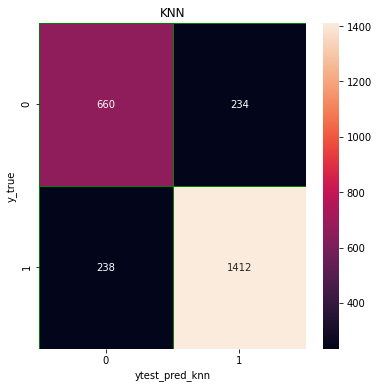

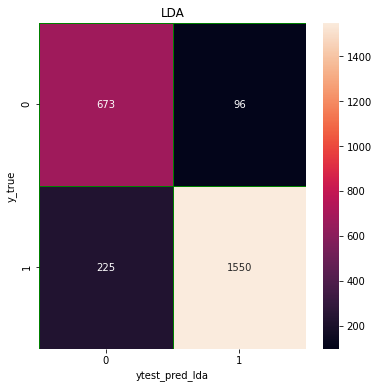

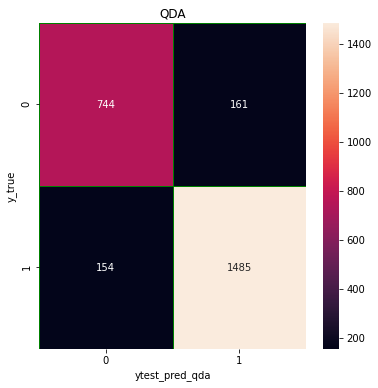

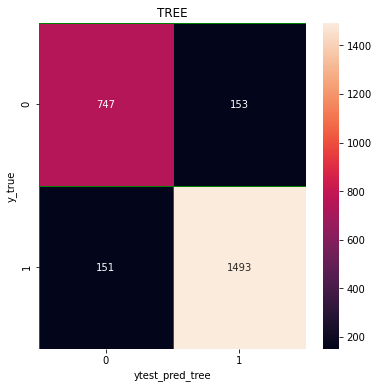

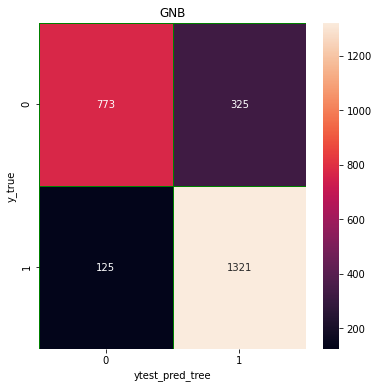

[0.         0.25055679 1.        ]


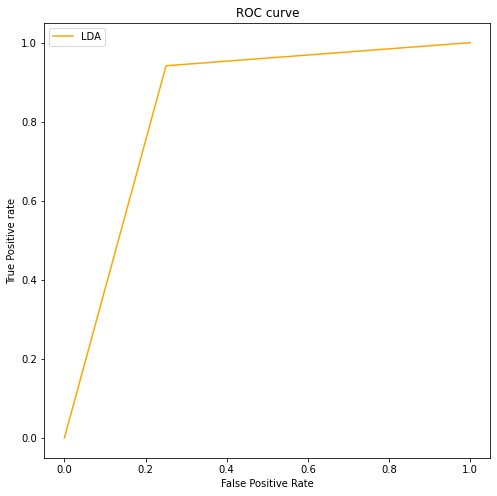

In [107]:
fpr, tpr, thresh = roc_curve(ytest.values, ytest_pred_lda)
auc_score = roc_auc_score(ytest.values, ytest_pred_lda)

print(fpr)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr,color='orange', label='LDA')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show();

In [97]:
ytest_pred_lda[:]

array([1, 1, 1, ..., 0, 1, 0])

In [105]:
ytest.values

array([1, 1, 1, ..., 0, 1, 0])

In [102]:
ALL_raw

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,35.0,0.9760,0.240,0.1570,0.924000,0.1080,-17.034,0.0382,68.828
1,0.0,0.8770,0.291,0.0939,0.779000,0.0799,-21.057,0.0342,102.084
2,63.0,0.9630,0.212,0.3010,0.003300,0.1300,-12.505,0.0384,84.025
3,56.0,0.9620,0.424,0.2140,0.000029,0.6810,-17.688,0.0763,113.211
4,59.0,0.9590,0.369,0.2100,0.000045,0.0905,-13.552,0.0437,131.714
...,...,...,...,...,...,...,...,...,...
8475,51.0,0.0966,0.839,0.4970,0.000000,0.0940,-6.088,0.3110,76.029
8476,56.0,0.0213,0.908,0.6960,0.000041,0.0747,-5.180,0.2640,102.032
8477,87.0,0.0136,0.781,0.5940,0.000000,0.1620,-6.959,0.0485,129.895
8478,72.0,0.2480,0.721,0.5650,0.000000,0.2840,-9.157,0.2800,93.800


In [57]:
Classification 

0       1
1       1
2       1
3       1
4       1
       ..
8475    0
8476    0
8477    0
8478    0
8479    0
Name: Classification, Length: 8480, dtype: int64

Explained variance = 0.30847785905232733 0.14280370541284143 0.11531471860618016 0.1077506766700485 0.09912765174164136 0.08753366134116415 0.07079475727294578 0.05018613073907772 
[ 30.84778591  45.12815645  56.65962831  67.43469597  77.34746115
  86.10082728  93.18030301  98.19891608 100.        ]
KNN:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       898
           1       0.90      0.92      0.91      1646

    accuracy                           0.88      2544
   macro avg       0.87      0.86      0.86      2544
weighted avg       0.88      0.88      0.88      2544

LDA:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       898
           1       0.85      0.93      0.89      1646

    accuracy                           0.85      2544
   macro avg       0.85      0.82      0.83      2544
weighted avg       0.85      0.85      0.85      2544

QDA:
              precision    rec

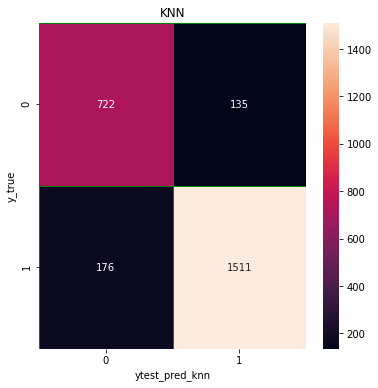

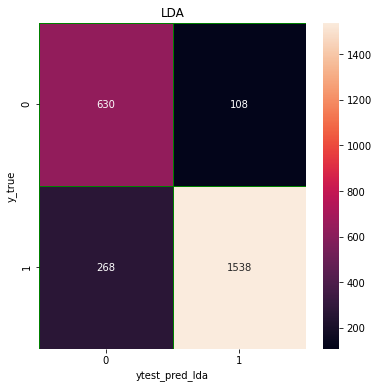

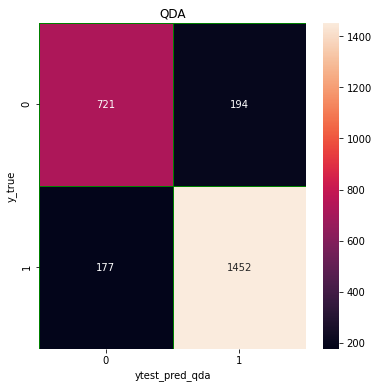

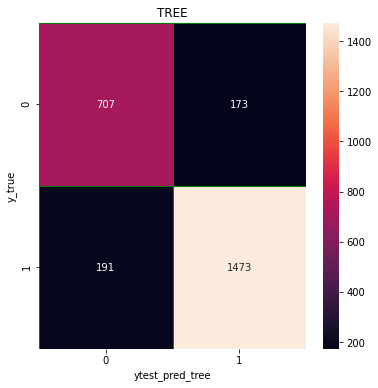

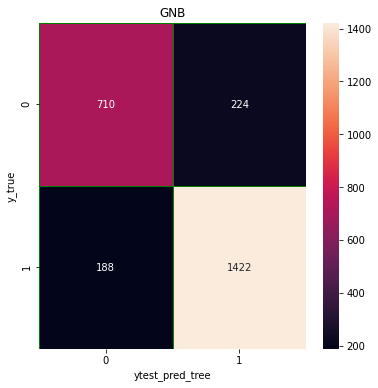

In [83]:
# PCA

# IMPORT SECTION ___________________________________________________________

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Dataset = ALL_raw

DS = StandardScaler().fit_transform(Dataset)
pca = decomposition.PCA(n_components=9).fit(DS)

print('Explained variance = {} {} {} {} {} {} {} {} '.format(*pca.explained_variance_ratio_))
print(100*pca.explained_variance_ratio_.cumsum())

Xproj = pca.transform(DS) 
Xreduced = Xproj[:,0:8] 
Xreduced.shape

dfpca = pd.DataFrame(Xproj[:,0:8], columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5','PCA6',  'PCA7','PCA8'])

X = Xreduced
y = Classification

# split the data with 70% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, train_size=0.7)

# SELECT CLASSIFIER
model_knn  = KNeighborsClassifier(n_neighbors=5)
model_lda  = LinearDiscriminantAnalysis(n_components=None,priors=None, store_covariance=True)
model_qda  = QuadraticDiscriminantAnalysis(priors=None,store_covariance=True)
model_tree = DecisionTreeClassifier()
model_gnb  = GaussianNB()


# FIT the model on one set of data
model_knn.fit(Xtrain, ytrain)
model_lda.fit(Xtrain, ytrain)
model_qda.fit(Xtrain, ytrain)
model_tree.fit(Xtrain, ytrain)
model_gnb.fit(Xtrain, ytrain)

# TEST evaluate the model on the second set of data
ytest_pred_knn  = model_knn.predict(Xtest)
ytest_pred_lda  = model_lda.predict(Xtest)
ytest_pred_qda  = model_qda.predict(Xtest)
ytest_pred_tree = model_tree.predict(Xtest)
ytest_pred_gnb  = model_gnb.predict(Xtest)

# Classification Report
print('KNN:')
print(classification_report(ytest, ytest_pred_knn))
print('LDA:')
print(classification_report(ytest, ytest_pred_lda))
print('QDA:')
print(classification_report(ytest, ytest_pred_qda))
print('TREE:')
print(classification_report(ytest, ytest_pred_tree))
print('GNB:')
print(classification_report(ytest, ytest_pred_gnb))


# Cross Validarion Scores
scores_knn  = cross_val_score(model_knn,  Xtest, ytest, cv=5)
scores_lda  = cross_val_score(model_lda,  Xtest, ytest, cv=5)
scores_qda  = cross_val_score(model_qda,  Xtest, ytest, cv=5)
scores_tree = cross_val_score(model_tree, Xtest, ytest, cv=5)
scores_gnb  = cross_val_score(model_gnb,  Xtest, ytest, cv=5)


# Cross Validation 
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("Accuracy LDA: %0.2f (+/- %0.2f)" % (scores_lda.mean(), scores_lda.std() * 2))
print("Accuracy QDA: %0.2f (+/- %0.2f)" % (scores_qda.mean(), scores_qda.std() * 2))
print("Accuracy TREE: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))
print("Accuracy GNB: %0.2f (+/- %0.2f)" % (scores_gnb.mean(), scores_gnb.std() * 2))


# Confusion Matrix Plot
cm1 = confusion_matrix(ytest_pred_knn, ytest)
cm2 = confusion_matrix(ytest_pred_lda, ytest)
cm3 = confusion_matrix(ytest_pred_qda, ytest)
cm4 = confusion_matrix(ytest_pred_tree, ytest)
cm5 = confusion_matrix(ytest_pred_gnb, ytest)


plt.figure(figsize=(6, 6))
sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_knn")
plt.ylabel("y_true")
plt.title('KNN')


plt.figure(figsize=(6, 6))
sns.heatmap(cm2,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_lda")
plt.ylabel("y_true")
plt.title('LDA')


plt.figure(figsize=(6, 6))
sns.heatmap(cm3,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_qda")
plt.ylabel("y_true")
plt.title('QDA')
plt.show()


plt.figure(figsize=(6, 6))
sns.heatmap(cm4,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_tree")
plt.ylabel("y_true")
plt.title('TREE')
plt.show()


plt.figure(figsize=(6, 6))
sns.heatmap(cm5,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f")
plt.xlabel("ytest_pred_tree")
plt.ylabel("y_true")
plt.title('GNB')
plt.show()